<a href="https://colab.research.google.com/github/suhani-didwania/bg_control/blob/main/eda_Suhani_Didwania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blood Glucose Control - EDA

**Name:** [Suhani Didwania]



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD.

In [1]:
import pandas as pd

df1 = pd.read_csv('gluroo_500030.csv')
df2 = pd.read_csv('gluroo_679372.csv')
df1['PWD'] = 1  # Label for the first person with diabetes
df2['PWD'] = 2  # Label for the second person with diabetes

# Step 4: Concatenate both datasets into a single DataFrame
df = pd.concat([df1, df2], ignore_index=True)

# Step 5: Display the combined dataframe
df.head()

,date,sender_id,bgl,bgl_date_millis,text,template,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,dose_automatic,fp_bgl,message_basal_change,__typename,trend,PWD
0,2024-05-01 00:00:27.029000-05:00,NaN,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,1
1,2024-05-01 00:05:27.183000-05:00,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,1
2,2024-05-01 00:10:26.949000-05:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,1
3,2024-05-01 00:15:27.180000-05:00,NaN,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,1
4,2024-05-01 00:20:27.021000-05:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,1


### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet.

##Blood Glucose Levels Over Time:
This visualization will plot the blood glucose levels over time to show how they fluctuate during the day. This is important for a PWD to understand patterns in their blood sugar and identify any spikes or drops.

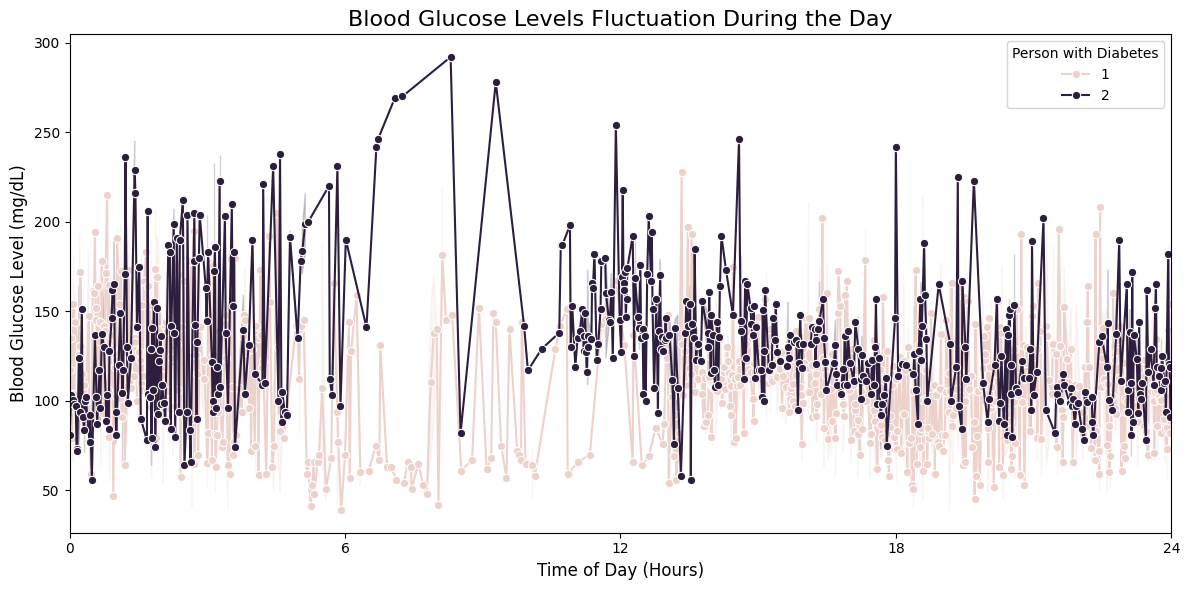

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df['bgl_datetime'] = pd.to_datetime(df['bgl_date_millis'], unit='ms')

# Extract hour and minute correctly to avoid exceeding 24 hours
df['hour_of_day'] = df['bgl_datetime'].dt.hour + df['bgl_datetime'].dt.minute / 60

# Now, create a plot to show blood glucose levels during a typical day
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour_of_day', y='bgl', hue='PWD', data=df, marker="o")

# Set x-axis limits from 0 to 24 to ensure proper day representation
plt.xlim(0, 24)

plt.title('Blood Glucose Levels Fluctuation During the Day', fontsize=16)
plt.xlabel('Time of Day (Hours)', fontsize=12)
plt.ylabel('Blood Glucose Level (mg/dL)', fontsize=12)
plt.xticks(np.arange(0, 25, 6))  # Set x-ticks from 0 to 24
plt.legend(title="Person with Diabetes")
plt.tight_layout()
plt.show()

##Effect of Insulin Doses on Blood Glucose Levels:
This graph plots blood glucose levels against insulin doses, with the size of each point representing the time progression (larger points indicate later dates).

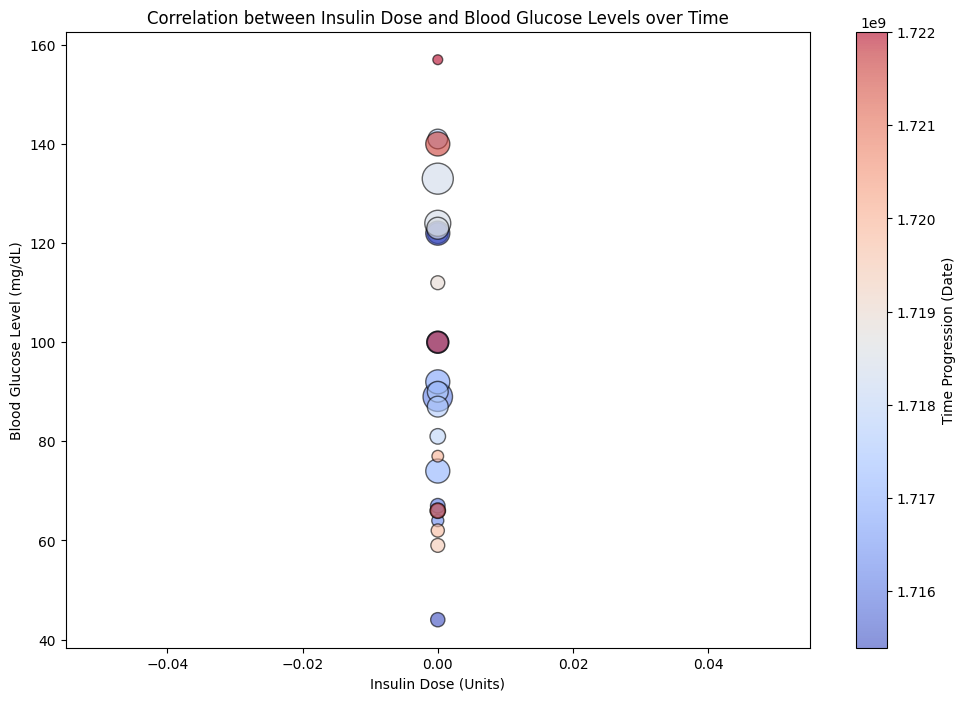

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import pandas as pd

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Check and remove rows with NaN or inf values
df = df.replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN
df = df.dropna(subset=['dose_units', 'bgl', 'food_g', 'date'])  # Drop rows where these columns have NaN

# Check if dose_units or bgl columns are constant
if df['dose_units'].nunique() == 1 or df['bgl'].nunique() == 1:
    print("Warning: One of the variables is constant, correlation cannot be calculated.")
    corr = None
else:
    # Correlation coefficient calculation
    corr, _ = pearsonr(df['dose_units'], df['bgl'])

# Normalize the 'date' column for color mapping
norm = plt.Normalize(df['date'].min().timestamp(), df['date'].max().timestamp())  # Convert datetime to timestamp for normalization

# Scatter plot with color based on time and size based on food intake (carbs in grams)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['dose_units'], df['bgl'],
                      c=df['date'].apply(lambda x: x.timestamp()), cmap='coolwarm',
                      s=df['food_g']*5, alpha=0.6, edgecolor='k', norm=norm)

# Adding regression line
sns.regplot(x='dose_units', y='bgl', data=df, scatter=False, color='red', line_kws={"lw":2})

# Display correlation coefficient if not constant
if corr is not None:
    plt.text(1, 250, f"Pearson Correlation: {corr:.2f}", fontsize=12, color='green')

# Add color bar for time progression
cbar = plt.colorbar(scatter)
cbar.set_label('Time Progression (Date)')

# Labels and title
plt.xlabel('Insulin Dose (Units)')
plt.ylabel('Blood Glucose Level (mg/dL)')
plt.title('Correlation between Insulin Dose and Blood Glucose Levels over Time')

# Show plot
plt.show()

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.*

1. How does the timing of insulin doses affect blood glucose levels? Specifically, does the time of day or the proximity to meals significantly impact blood glucose regulation in Type 1 Diabetes (T1D) patients?
2. Is there an optimal range of insulin dosage that consistently brings blood glucose levels to a safe range (e.g., 80-120 mg/dL) without causing hypoglycemia? How can this range be individualized for each patient based on the data trends?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future.

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`